In [99]:
import pandas as pd
import numpy as np
pd.__version__

# 데이터 불러오기

train=pd.read_csv('train.csv', delimiter=',')
test=pd.read_csv('test.csv', delimiter=',')

In [100]:
# 데이터 확인
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
# 컬럼 데이터 유형 확인
train.info()
# age는 결측치 (714/891)가 있다.
# Cabin도 결측치(204/891)가 있다.
# Embarked 결측치(889/891)가 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
# 결측치(null)값 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
# 시각화를 통한 데이터 분석
# matplotlib, seaborn 로드
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.__version__

'0.10.0'

# Categorical Features 찾아서 그래프 그리기

In [106]:
# 성별/생존 유무의 인원수를 막대그래프로
train[train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [107]:
#SibSp의 생존 유무 함수 만들어 Bar 그래프 그리기 
#bar_chart 함수를 만들어서 변수를 "SibSp'입력받아 그래프 그리기 bar_chart('SibSp')
def bar_chart(value):
    survived3=train[train['Survived']==1][value].value_counts()
    dead3=train[train['Survived']==0][value].value_counts()
    df3=pd.DataFrame([survived3,dead3])
    df3.index=['Survived','Dead']
    df3.plot(kind='bar', stacked=True, figsize=(5,5))
    plt.show()

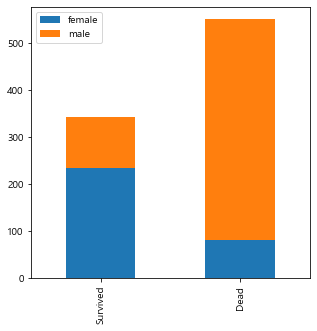

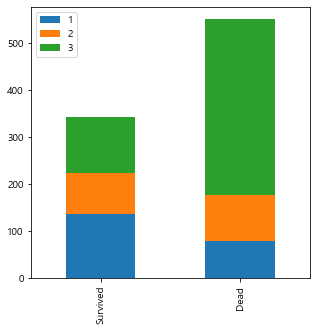

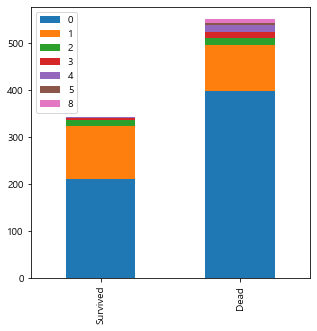

In [108]:
bar_chart("Sex")
bar_chart("Pclass")
bar_chart("SibSp")

# 피쳐 엔지니어링(Feature engineering)

## 1) Name 컬럼 변경하기

In [109]:
train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [110]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Countess      1
Sir           1
Mme           1
Don           1
Ms            1
Lady          1
Capt          1
Name: Title, dtype: int64

 ### Title 칼럼의 데이터를 mapping 시킴
 
    - {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }    

In [111]:
# 앞의 데이터를 미리 다른 곳에 저장해두기
train_bk=train[:]
test_bk=test.copy()

In [112]:
title_mapping={"Mr": 0, "Miss" : 1, "Mrs" : 2,
               "Master" : 3, "Dr" : 3, "Rev" : 3,
               "Col" : 3, "Major" : 3, "Mlle" : 3,
               "Countess" : 3, "Ms" : 3, "Lady" : 3,
               "Jonkheer" : 3, "Don" : 3,
               "Mme" : 3, "Capt" : 3, "Sir" : 3}

In [113]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


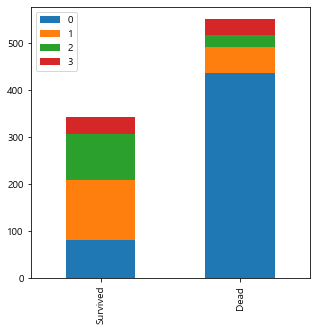

In [114]:
# Title 컬럼별 / 생존 유 무 별 생존자 수 bar 그래프 그리기
bar_chart('Title')

In [115]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [116]:
# Name 컬럼 삭제후
train_bk03=train[:]
test_bk03=test.copy()

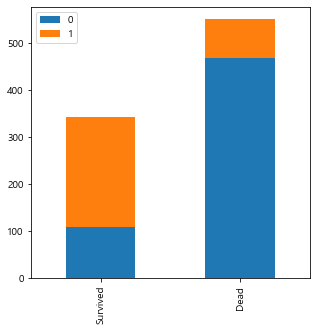

In [117]:
train['Sex']
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

In [118]:
#성별칼럼 변경 후
train_bk04=train[:]
test_bk04=test.copy()

In [119]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [120]:
train["Age"].fillna(train.groupby("Title")["Age"]. transform("median"),
                    inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"]. transform("median"),
                    inplace=True)

In [121]:
# 나이 결측치 fillna 이후
train_bk05=train[:]
test_bk05=test.copy()

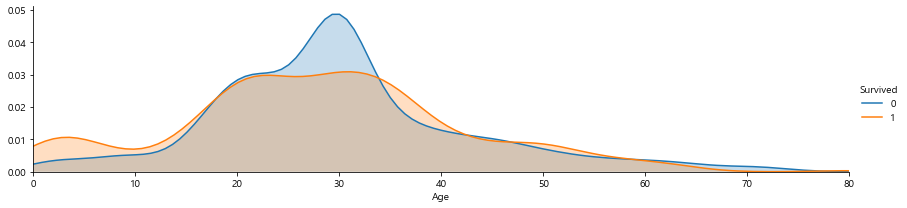

In [122]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(30, 40)

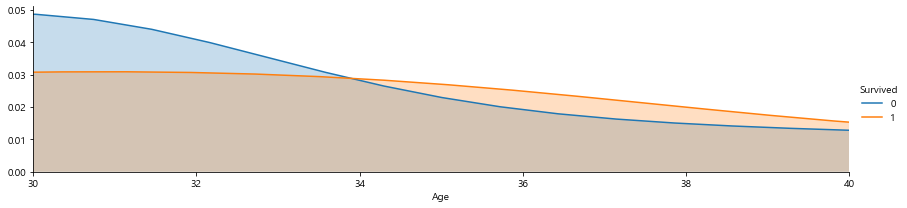

In [123]:
# sns.FacetGrid
# sns.kdeplot

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(30,40)
#0~20, 20~30, 30~40, 40~60

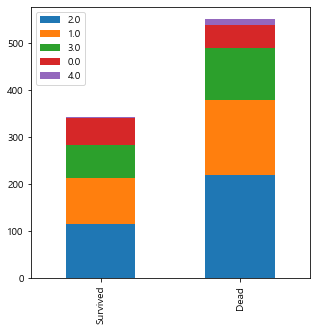

In [124]:
# Age 16세 이하=0
# 16세보다 크고 26세보다 작으면 = 1
# 26세보다 크고 36세보다 작으면 = 2
# 36세보다 크고 62세보다 작으면 = 3
# 62세보다 크면 4
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age']=4
    
bar_chart('Age')

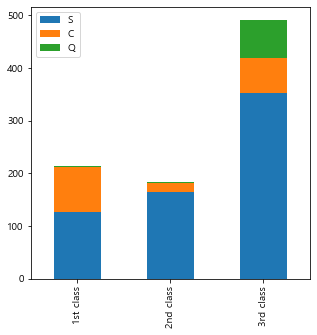

In [125]:
# 좌석 등급별로 어느 출항지에서 탔는지

Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(5,5))

In [127]:
train['Embarked'].isnull().sum()

2

In [128]:
for dataset in train_test_data:
    # dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked'].fillna('S', inplace=True)
    

In [129]:
train['Embarked'].isnull().sum()

0

In [130]:
embark_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embark_mapping)
    

In [131]:
# Fare:Fare 결측치 확인 : 결측치는 Pclass별, 요금별, median 값으로 변경
# Fare별 생존별 Kdeplot을 그리기


test["Fare"].fillna(test.groupby("Pclass")["Fare"]. transform("median"),
                    inplace=True)

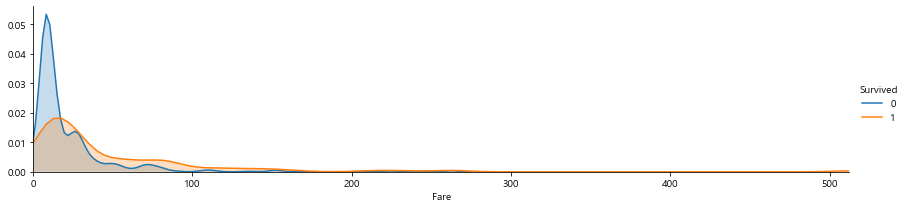

In [132]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

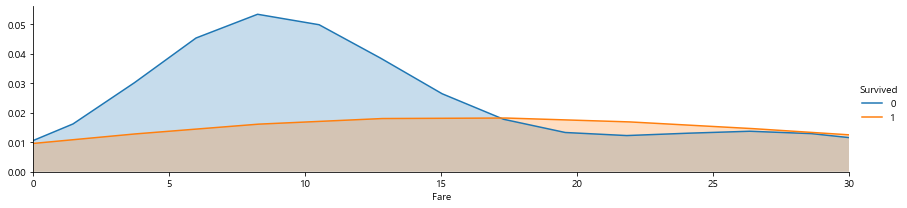

In [133]:
#0~20, 0~30, 

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

plt.show()

In [137]:
train.loc[train['Fare'] == 30,'Fare']

580    30.0
630    30.0
740    30.0
782    30.0
887    30.0
889    30.0
Name: Fare, dtype: float64

In [138]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare']=0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare']=3

In [139]:
# Cabin 전처리:   
# Cabin 데이터 유형 확인( value_counts)
# Cabin 에서 앞에 1자리만 추출해서 변경하기
# Pclass별/ Cabin 분포 확인(value_counts) 후 Bar 그래프
# "A":0, b(0.4), C:0.8, D:1.2, E:1.6, F:2, G:2.4, T:2.8
# 결측치는 Pclass별 Cabin별 중앙값으로 대체 

train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2


In [140]:
# train.'Cabin'.value_counts()
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
A23            1
A36            1
D21            1
E49            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [141]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2


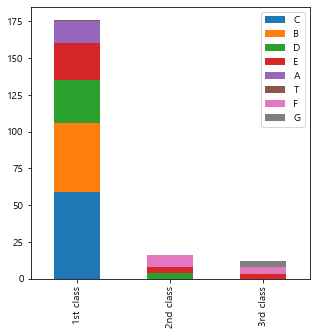

In [142]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(5,5))

In [143]:
cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)
    
    

In [144]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"]. transform("median"),
                    inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"]. transform("median"),
                    inplace=True)
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2


In [145]:
train['Cabin'].isnull().sum()

0

In [ ]:
# SibSp, Parch 전처리:
#F amilySize= SibSp+Parch+1
# kdeplot.FamilySize 그래프 그리기 -1(0), 2(0.4),3(0.8).....11(4)

In [147]:
for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,1
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,1
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,5
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,3
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,2


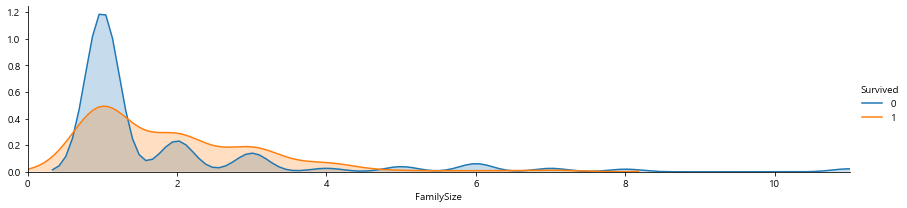

In [148]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.show()

In [149]:
train["FamilySize"].value_counts()

family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)
    
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2,0.4


In [150]:
# Ticket, PassengerId컬럼 삭제: 

for dataset in train_test_data:
    dataset.drop(['PassengerId','Ticket'], axis=1, inplace=True)
    
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,1,0,2.0,0.8,1,2,0.4


In [159]:
y = train.iloc[:,0]
x = train.iloc[:,1:]

In [231]:
from xgboost import XGBClassifier

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.2
)

In [239]:
model = XGBClassifier(min_samples_leaf=3,n_estimators=150)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)
feature_importances_ = model.feature_importances_

[18:00:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8435754189944135


In [245]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
331,1,0,3.0,0,0,1.0,0.8,0,0,0.0
733,2,0,1.0,0,0,0.0,1.8,0,0,0.0
382,3,0,2.0,0,0,0.0,2.0,0,0,0.0
704,3,0,1.0,1,0,0.0,2.0,0,0,0.4
813,3,1,0.0,4,2,2.0,2.0,0,1,2.4
...,...,...,...,...,...,...,...,...,...,...
106,3,1,1.0,0,0,0.0,2.0,0,1,0.0
270,1,0,2.0,0,0,2.0,0.8,0,0,0.0
860,3,0,3.0,2,0,0.0,2.0,0,0,0.8
435,1,1,0.0,1,2,3.0,0.4,0,1,1.2


In [256]:
feature_importances = pd.DataFrame({'xgb_feature_importance':feature_importances_}, index=x_train.columns)

In [259]:
feature_importances = feature_importances.sort_values(by=['xgb_feature_importance'],ascending=False)
feature_importances

,xgb_feature_importance
Title,0.491907
Pclass,0.186071
FamilySize,0.072466
Sex,0.072028
Cabin,0.041278
Age,0.030865
Embarked,0.029852
SibSp,0.029518
Fare,0.026935
Parch,0.019080


Text(0, 0.5, 'feature_importances')

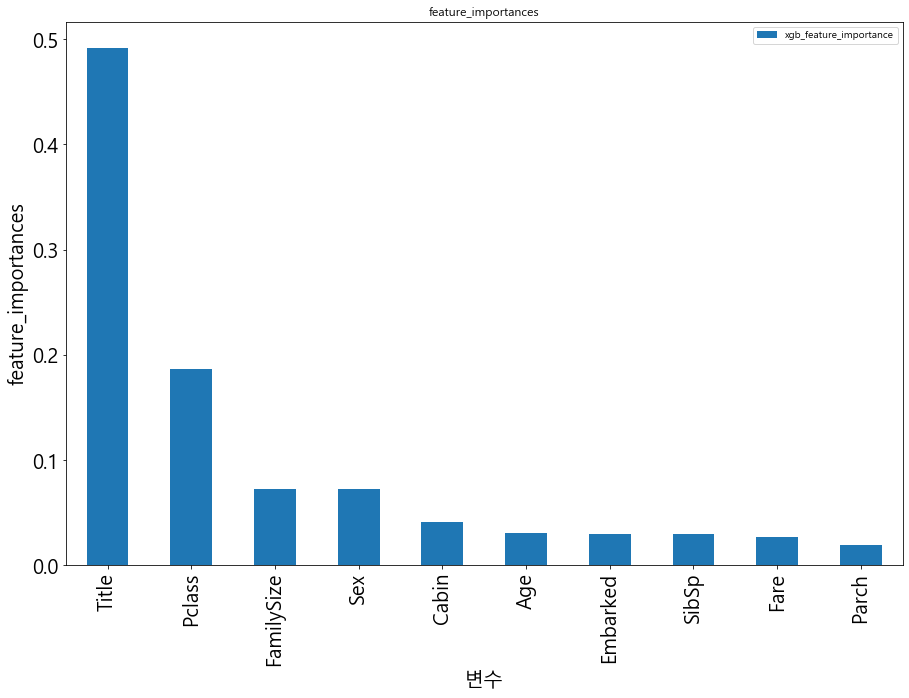

In [261]:
import matplotlib.pyplot as plt
ax = feature_importances.plot(kind='bar', title='feature_importances', figsize=(15,10), 
            legend=True, fontsize=20)
ax.set_xlabel('변수', fontsize=20)        
ax.set_ylabel('feature_importances', fontsize=20) 

In [264]:
corr = train.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.090499,-0.035322,0.081629,0.292884,-0.279477,0.106811,0.445792,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.314046,0.083081,0.018443,-0.693736,0.864697,0.045702,-0.164205,0.065997
Sex,0.543351,-0.131900,1.000000,-0.130828,0.114631,0.245489,0.216932,-0.093314,0.116569,0.557890,0.200988
Age,-0.090499,-0.314046,-0.130828,1.000000,-0.268832,-0.171533,0.071564,-0.265643,-0.036063,-0.171512,-0.269433
SibSp,-0.035322,0.083081,0.114631,-0.268832,1.000000,0.414838,0.341187,0.072361,-0.059961,0.287060,0.890712
Parch,0.081629,0.018443,0.245489,-0.171533,0.414838,1.000000,0.364097,0.016359,-0.078665,0.341660,0.783111
Fare,0.292884,-0.693736,0.216932,0.071564,0.341187,0.364097,1.000000,-0.668376,-0.008131,0.278740,0.415087
Cabin,-0.279477,0.864697,-0.093314,-0.265643,0.072361,0.016359,-0.668376,1.000000,-0.041238,-0.141768,0.057629
Embarked,0.106811,0.045702,0.116569,-0.036063,-0.059961,-0.078665,-0.008131,-0.041238,1.000000,0.049699,-0.080281
Title,0.445792,-0.164205,0.557890,-0.171512,0.287060,0.341660,0.278740,-0.141768,0.049699,1.000000,0.366883


In [267]:
Survived = corr.loc[:,['Survived']]
Survived = abs(Survived)
a = Survived.sort_values(by=['Survived'],
                              ascending=False)
a = a[2:]
a

,Survived
Title,0.445792
Pclass,0.338481
Fare,0.292884
Cabin,0.279477
Embarked,0.106811
Age,0.090499
Parch,0.081629
SibSp,0.035322
FamilySize,0.016639


Text(0, 0.5, '상관관계')

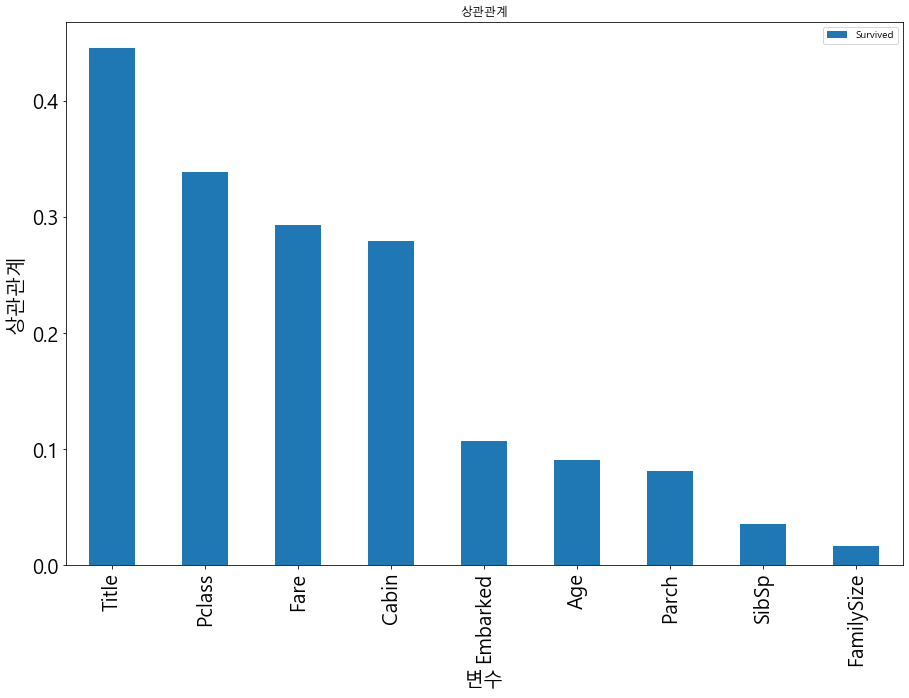

In [268]:
ax = a.plot(kind='bar', title='상관관계', figsize=(15,10), 
            legend=True, fontsize=20)
ax.set_xlabel('변수', fontsize=20)        
ax.set_ylabel('상관관계', fontsize=20) 

In [262]:
# XGBClassifier 적용 후 제출

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pipe = Pipeline([("scaler",MinMaxScaler()),("xgb",XGBClassifier())])

parameters = [
    {'xgb__n_estimators':[1, 10, 100, 1000],'xgb__learning_rate':[0.1,0.3,0.5,0.8]},     
]

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = RandomizedSearchCV(pipe, parameters, cv=5)
model.fit(x_train, y_train) 
acc = model.score(x_test, y_test)
print("============================")
print("최적의 매개 변수는(estimator):",model.best_estimator_)
print("============================")
print("최적의 매개 변수는(params):",model.best_params_)
print("============================")
print("acc는 ",acc)

submission = pd.read_csv('gender_submission.csv')

pred = model.predict(test)

submission['Survived']=pred

submission

submission.to_csv('submission1.csv', index=None)

In [206]:
pipe.fit(x_train, y_train) 
print("acc:", pipe.score(x_test,y_test))

acc: 0.8379888268156425


In [203]:
model = XGBClassifier(min_samples_leaf=1,n_estimators=300) 

In [204]:
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

[17:47:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8379888268156425
